In [8]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

import os
print(os.getcwd())

/Users/eoghankealy/Documents/data_projects


In [10]:
# Use only the filename of  CSV file
df = pd.read_csv('logistic_regression_for_python.csv') 

# Display the first few rows to verify
print(df.head())

   is_canceled  intercept  lead_time_std   adr_std  no_deposit  \
0            0          1      -0.882085 -0.339170           1   
1            0          1      -0.819588 -0.339170           1   
2            0          1      -0.809172  0.079986           1   
3            0          1      -0.809172  0.079986           1   
4            0          1      -0.954998  0.244003           1   

   prev_cancelations  repeat_guest  market_corporate  market_onlineTA  \
0                  0             0                 0                0   
1                  0             0                 1                0   
2                  0             0                 0                1   
3                  0             0                 0                1   
4                  0             0                 0                0   

   market_offlineTA/TO  market_groups  market_comp  booking_changes_flag  
0                    0              0            0                     0  
1             

In [36]:
# Y is the Actual Outcome (is_canceled from Excel)
Y = df['is_canceled']

# X is the list of all standardized predictor columns ( intercept  through to  last predictor)
#  replace these placeholder names with the EXACT column headers from CSV
X_cols = ['intercept', 'lead_time_std', 'adr_std', 'no_deposit', 'prev_cancelations', 
          'repeat_guest', 'market_corporate', 'market_onlineTA', 'market_offlineTA/TO', 
          'market_groups', 'market_comp', 'booking_changes_flag'] 

X = df[X_cols]

In [38]:
print(X.head())

   intercept  lead_time_std   adr_std  no_deposit  prev_cancelations  \
0          1      -0.882085 -0.339170           1                  0   
1          1      -0.819588 -0.339170           1                  0   
2          1      -0.809172  0.079986           1                  0   
3          1      -0.809172  0.079986           1                  0   
4          1      -0.954998  0.244003           1                  0   

   repeat_guest  market_corporate  market_onlineTA  market_offlineTA/TO  \
0             0                 0                0                    0   
1             0                 1                0                    0   
2             0                 0                1                    0   
3             0                 0                1                    0   
4             0                 0                0                    0   

   market_groups  market_comp  booking_changes_flag  
0              0            0                     0  
1       

In [40]:
# Create the Logit model object
logit_model = sm.Logit(Y, X)

# Fit the model (solves for the optimal coefficients instantly)
results = logit_model.fit()

# Print the full summary—this contains the final, precise coefficients
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.464071
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            is_canceled   No. Observations:                24851
Model:                          Logit   Df Residuals:                    24839
Method:                           MLE   Df Model:                           11
Date:                Wed, 26 Nov 2025   Pseudo R-squ.:                  0.2043
Time:                        02:19:04   Log-Likelihood:                -11533.
converged:                       True   LL-Null:                       -14494.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept                1.2436      0.106     11.722      0.000       1.036       1.452

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

                 feature        VIF
0              intercept  31.998788
1          lead_time_std   1.355739
2                adr_std   1.146306
3             no_deposit   1.405541
4      prev_cancelations   1.130988
5           repeat_guest   1.094479
6       market_corporate   1.302802
7        market_onlineTA   2.113855
8    market_offlineTA/TO   1.971434
9          market_groups   2.355586
10           market_comp   1.052559
11  booking_changes_flag   1.044959


In [42]:

# Import functions for ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [44]:
# Y is the actual outcome (is_canceled)
# X is the matrix of predictors + constant

# Calculate predicted probabilities (BD column in Excel)
y_probabilities = results.predict(X)

In [46]:
# Calculate FPR (x-axis), TPR (y-axis), and the thresholds
# Y is the Actual Outcome (is_canceled), y_probabilities are the predicted risks
fpr, tpr, thresholds = roc_curve(Y, y_probabilities)

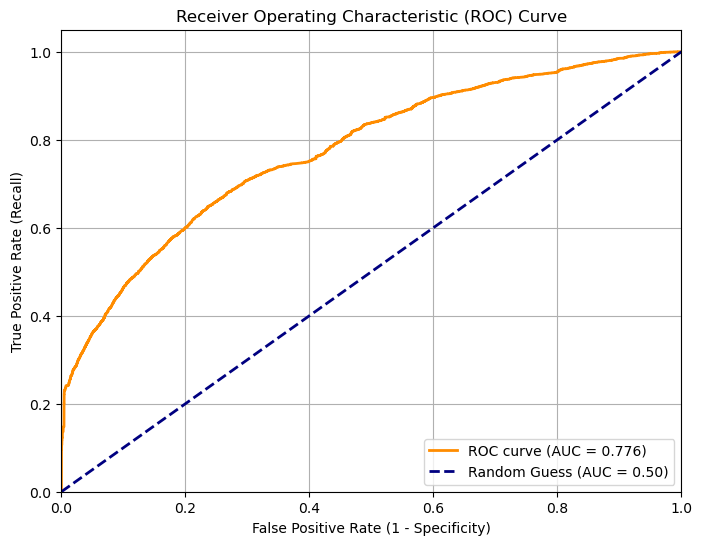

In [48]:
# Calculate the Area Under the Curve (AUC) score
roc_auc = roc_auc_score(Y, y_probabilities)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess (AUC = 0.50)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()